# Анализ убыточности развлекательного приложения Procrastinate Pro+

**Описание проекта:**

Я - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев наш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Мне нужно разобраться в причинах этой ситуации.

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.


##  Загрузка данных и подготовка их к анализу


In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
# чтение файлов и сохранение в переменных visits, orders, costs 
if os.path.exists('/datasets/visits_info_short.csv'):
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep = ',')
else:
    visits = pd.read_csv('visits_info_short.csv', sep = ',')

In [3]:
if os.path.exists('/datasets/orders_info_short.csv'):
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep = ',')
else:
    orders = pd.read_csv('orders_info_short.csv', sep = ',')

In [4]:
if os.path.exists('/datasets/costs_info_short.csv'):
    costs = pd.read_csv('/datasets/costs_info_short.csv', sep = ',')
else:
    costs = pd.read_csv('costs_info_short.csv', sep = ',')

In [5]:
# просмотр первых пяти строк таблицы visits
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [6]:
# получение общей информации о данных в таблице visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Структура таблицы visits

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

In [7]:
# просмотр первых пяти строк таблицы orders
orders.head(25)

User Id             Event Dt  Revenue
0   188246423999  2019-05-01 23:09:52     4.99
1   174361394180  2019-05-01 12:24:04     4.99
2   529610067795  2019-05-01 11:34:04     4.99
3   319939546352  2019-05-01 15:34:40     4.99
4   366000285810  2019-05-01 13:59:51     4.99
5   129100331057  2019-05-01 01:56:28     4.99
6   626807144131  2019-05-01 02:39:21     4.99
7   914062168985  2019-05-01 02:02:18     4.99
8   769669137453  2019-05-01 03:39:47     4.99
9   434198630691  2019-05-01 18:16:50     5.99
10  846285993293  2019-05-01 13:14:07     4.99
11   64474110919  2019-05-01 02:21:45     4.99
12   68752468250  2019-05-01 20:25:33     4.99
13  946239768828  2019-05-01 21:11:24     4.99
14  872148430066  2019-05-01 09:18:02     4.99
15   29144643737  2019-05-01 09:56:07     4.99
16  784328289169  2019-05-01 16:52:30     4.99
17  645547903112  2019-05-01 05:54:57     4.99
18   59058997486  2019-05-01 11:00:21     4.99
19  784885401335  2019-05-02 06:30:36     4.99
20  778027854258  2019-05-02 20:56:43     4.99
21  434198630691  2019-05-02 21:01:37     4.99
22  353725123625  2019-05-02 13:53:48     4.99
23  784328289169  2019-05-02 17:06:01     4.99
24  109843833662  2019-05-02 12:10:22     4.99

In [8]:
# получение общей информации о данных в таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Структура таблицы orders

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

In [9]:
# просмотр первых пяти строк таблицы costs
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [10]:
# получение общей информации о данных в таблице costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Структура таблицы costs

* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.

In [11]:
# приведем название столбцов в таблицах к нижнему регистру и заменим пробелы на нижнее подчеркивание
visits = visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 
                                'Channel': 'channel', 'Session Start': 'session_start', 'Session End':'session_end'})

In [12]:
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})

In [13]:
costs = costs.rename(columns={'Channel': 'channel'})

In [14]:
# преобразуем тип данных со временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [15]:
# посмотрим наличие явных дубликатов
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
costs.duplicated().sum()

0

### Вывод
 
 Просмотрев информацию о таблицах, убедились, что в них нет пропусков, количество значений совпадает во всех столбцах у каждой таблицы.
 
 Проверив дубликаты, их не обнаружили.

 Поменяли тип данных в столбцах содержащих даты.
 

## Задание функции для расчета и анализа LTV, ROI, удержания и конверсии


In [18]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [20]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Доход')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Доход')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 5, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Затраты на привлечение')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 3)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Окупаемость в %')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 4, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.ylabel('Окупаемость в %')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


##  Проведение исследовательского анализа данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [23]:
# Загрузим профили пользователей, для этого вызовем функцию get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [24]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [25]:
# Определим минимальную дату привлечения пользователей
min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [26]:
# Определим максимальную дату привлечения пользователей
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

In [27]:
# для просмотра из каких регионов приходят пользователи сгрупируем их профили по регионам
# так же расчитаем, какая доля новых посетителей стала покупателями в каждой стране
region = (profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by=['user_id'],ascending=False))
region

user_id     payer
region                          
United States   100002  0.069019
UK               17575  0.039829
France           17450  0.037994
Germany          14981  0.041119

In [28]:
# для просмотра какими устройствами пользуются пользователи сгрупируем их профили по device
# так же расчитаем, какая доля новых посетителей стала покупателями на каждом устройстве
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by=['user_id'],ascending=False)# допишите код
device

user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644

In [29]:
# для просмотра по каким рекламным каналам шло привлечение пользователей, сгрупируем их профили по channel
# так же расчитаем, из какого рекламного канала пришло больше платящих пользователей
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by=['user_id'],ascending=False)# допишите код
channel

user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700

### Вывод:

* Минимальная дата привлечения клиентов  - 1 мая 2019 года
* Максимальная дата привлечения клиентов  - 27 октября 2019 года.
* Пользователи приходят из таких регионов как  - United States, UK, France, Germany
* Больше всего платящих пользователей в United States, Germany
* Пользователи нашего приложения пользуются устройствами такими как : iPhone, Android, PC, Mac
* Больше всего платящих пользователей на Mac и iPhone
* Привлечение пользователей шло по рекламным каналам таким как : FaceBoom, TipTop, OppleCreativeMedia, LeapBob,
  WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, AdNonSense, lambdaMediaAds.
* Топ -3 рекламных канала, которые приносят больше всего платящих пользователей: FaceBoom, AdNonSense, lambdaMediaAds. 
* Очень много приходят органических пользователей, значит приложения популярное.Но платящих пользователей из данного какнала всех меньше.

##  Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [30]:
# Посчитаем общую сумму расходов на маркетинг
costs_sum = costs['costs'].sum().astype(int)
costs_sum

105497

In [31]:
# При помощи группировки, посмотрим сколько денег потратитли на каждый источник в отельности
# отсортируем по убыванию сумм расходов
cost_marketing = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by=['costs'],ascending=False)
cost_marketing['percent'] = (cost_marketing['costs'] / costs_sum)*100
cost_marketing.style.format({'percent': '{:.2f}%'})

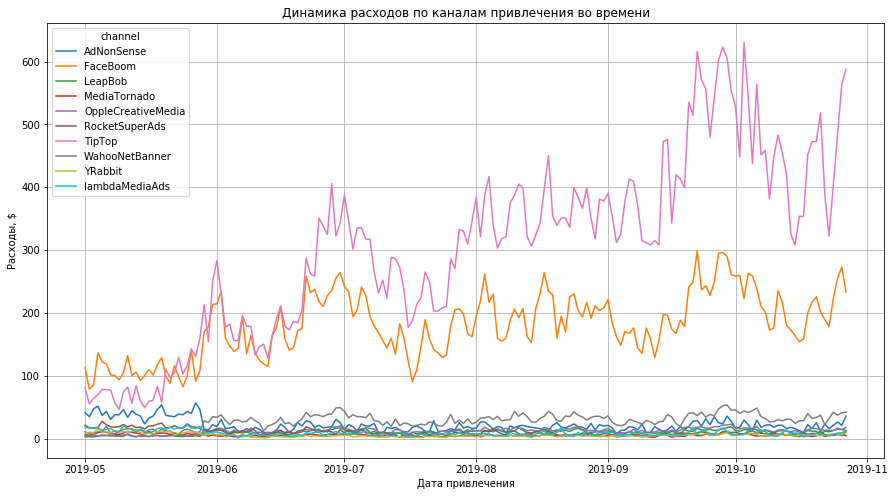

In [32]:
# Построим график, при помощи plot(), для просмотра как распределенны траты на рекламу во времени по источникам.
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 8))
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по каналам привлечения во времени')
plt.show()

In [33]:
# Рассчитаем средний CAC на одного пользователя для всего проекта
# Уберем органических пользователей, так как мы за них ничего не платим

profiles = profiles.query('channel != "organic"')
profiles['acquisition_cost'].mean().round(5)

1.12748

In [34]:
# Рассчитаем средний CAC на одного пользователя для каждого источника трафика

(profiles.groupby('channel').agg({'acquisition_cost': 'mean'})
                           .rename(columns={'acquisition_cost': 'cac'})
                           .sort_values(by=['cac'],ascending=False))

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172

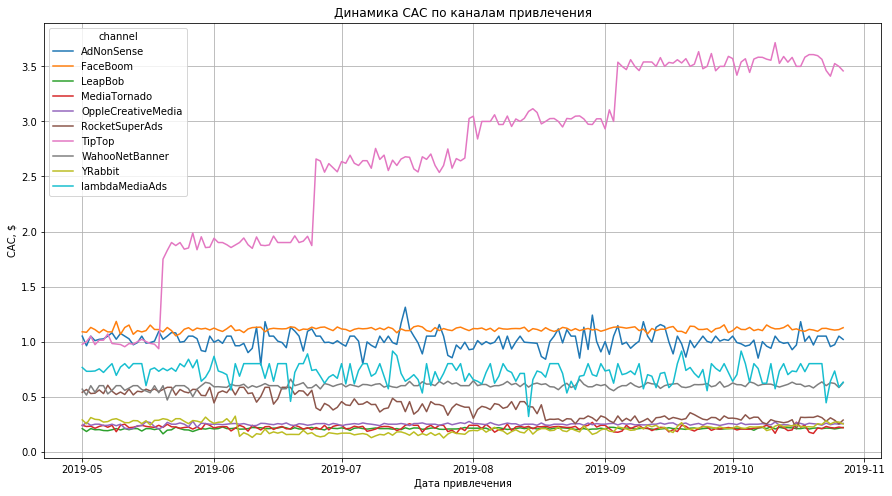

In [35]:
# Построим график динамики САС по источникам во времени
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


### Вывод:

* Общая сумма расходов на маркетинг в период с 1 мая по 27 октября 2019 года составила 105497 долларов.
* Всех больше потратили денег на рекламу такие источники как : TipTop (54751.30) и FaceBoom (32445.60)
* Всех меньше тратят денег на рекламу MediaTornado (954.48) и YRabbit (944.22)		
* Средняя стоимость привлечения одного пользователя для всего проекта составляет 0.70328 долларов.
* Всех дороже обходятся клиенты, привлеченные из источников TipTop (2,799) и FaceBoom (1,113).
* Всех дешевле обходятся клиенты, пришедшие из источников MediaTornado	(0.219) и LeapBob (0.210).
* Клиенты из organic пришли сами, без помощи рекламы.
* Средняя стоимость привлечения клиента у всех источников в течении всего периода стабильна, только у TipTop она постоянно растет до сентября, далее стабильна.

##  Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые обнаружили. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считаем, что мы смотрим на данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Анализ общей окупаемости рекламы

In [36]:
# посчитаем LTV и ROI, вызвав функцию get_ltv
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

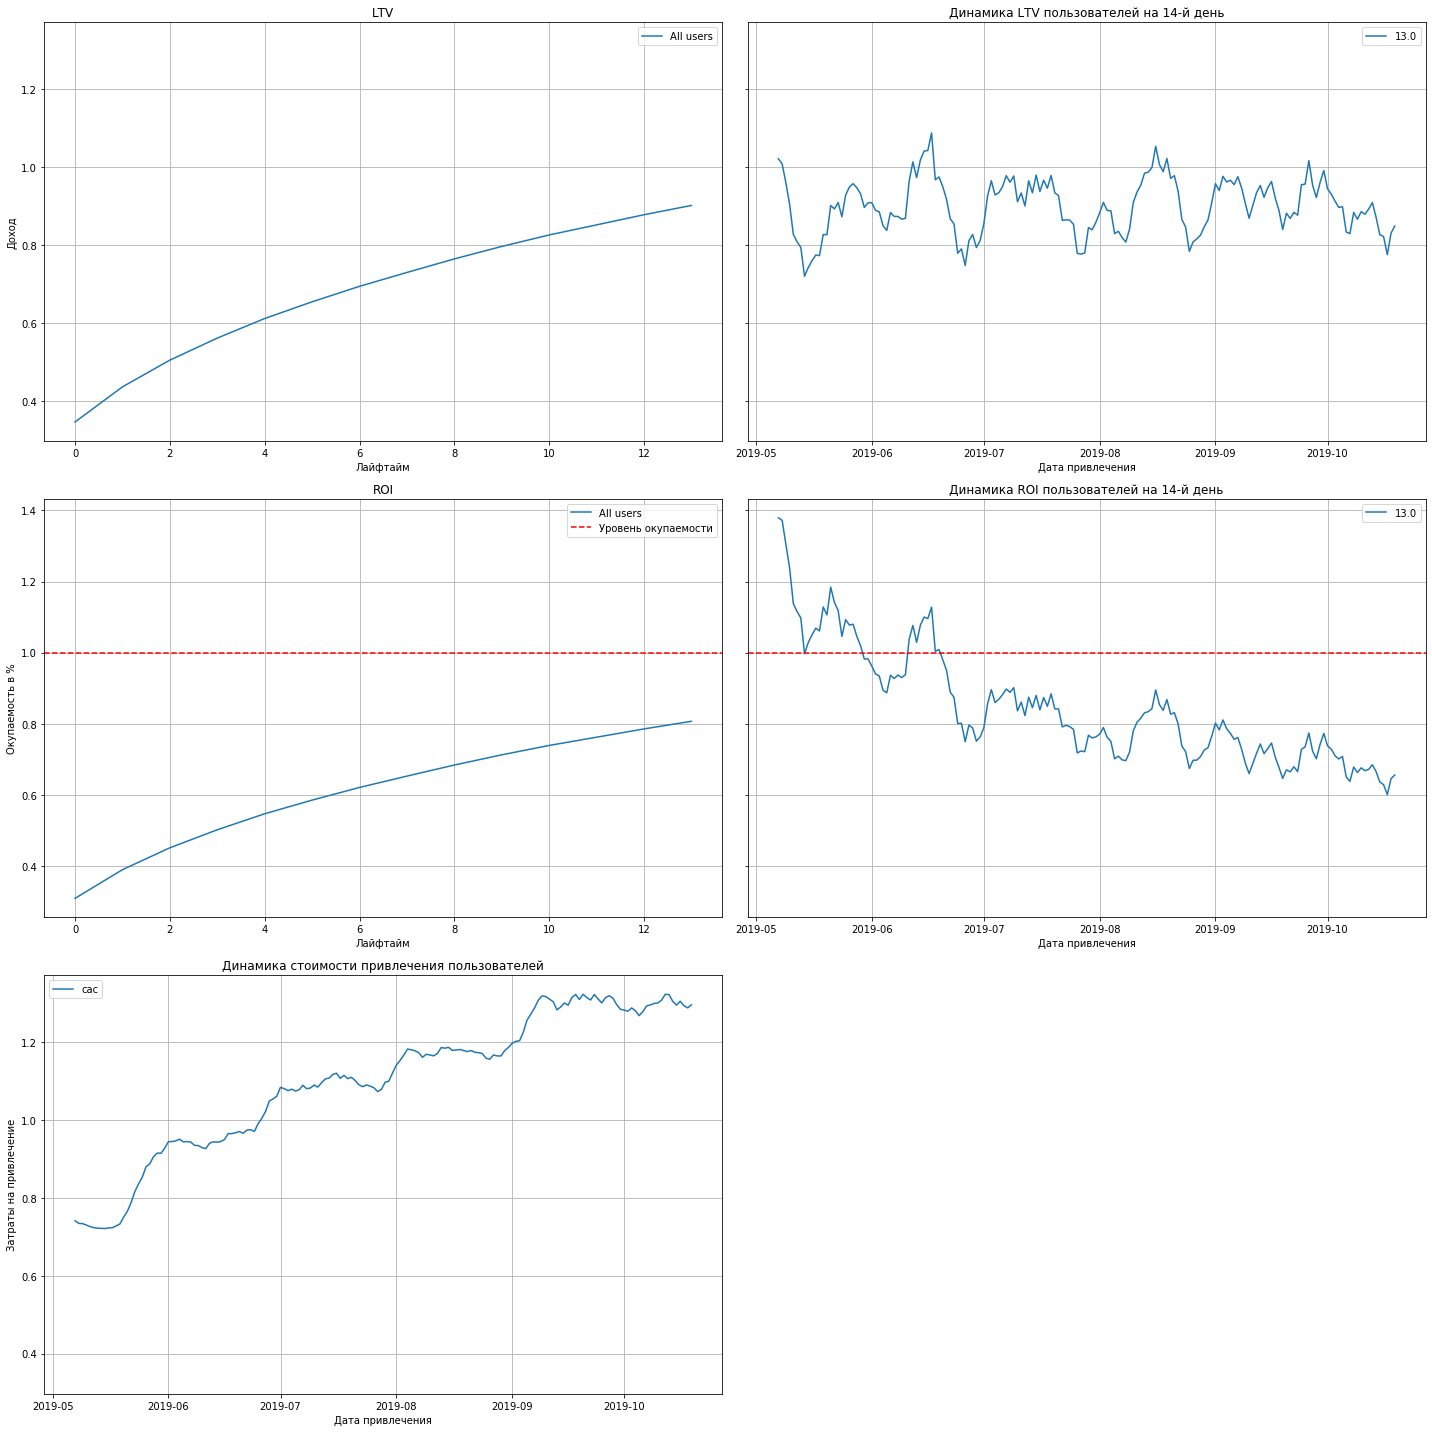

In [37]:
# построим графики, вызвав функцию plot_ltv_roi
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Вывод:

* Реклама не окупается. ROI в конце второй недели достигает 80%.
* CAC в течении всего периода постепенно увеличивается. Возможно убытки из-за увеличения рекламного бюджета.
* В мае, частично июне реклама окупается, далее окупаемости нет. 
* На LTV сезонных факторов не наблюдается, данный показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей
* Посмотрим окупаемость с разбивкой, поищем там причину постоянных убытков нашего приложения.


### Анализ окупаемости рекламы с разбивкой по устройствам

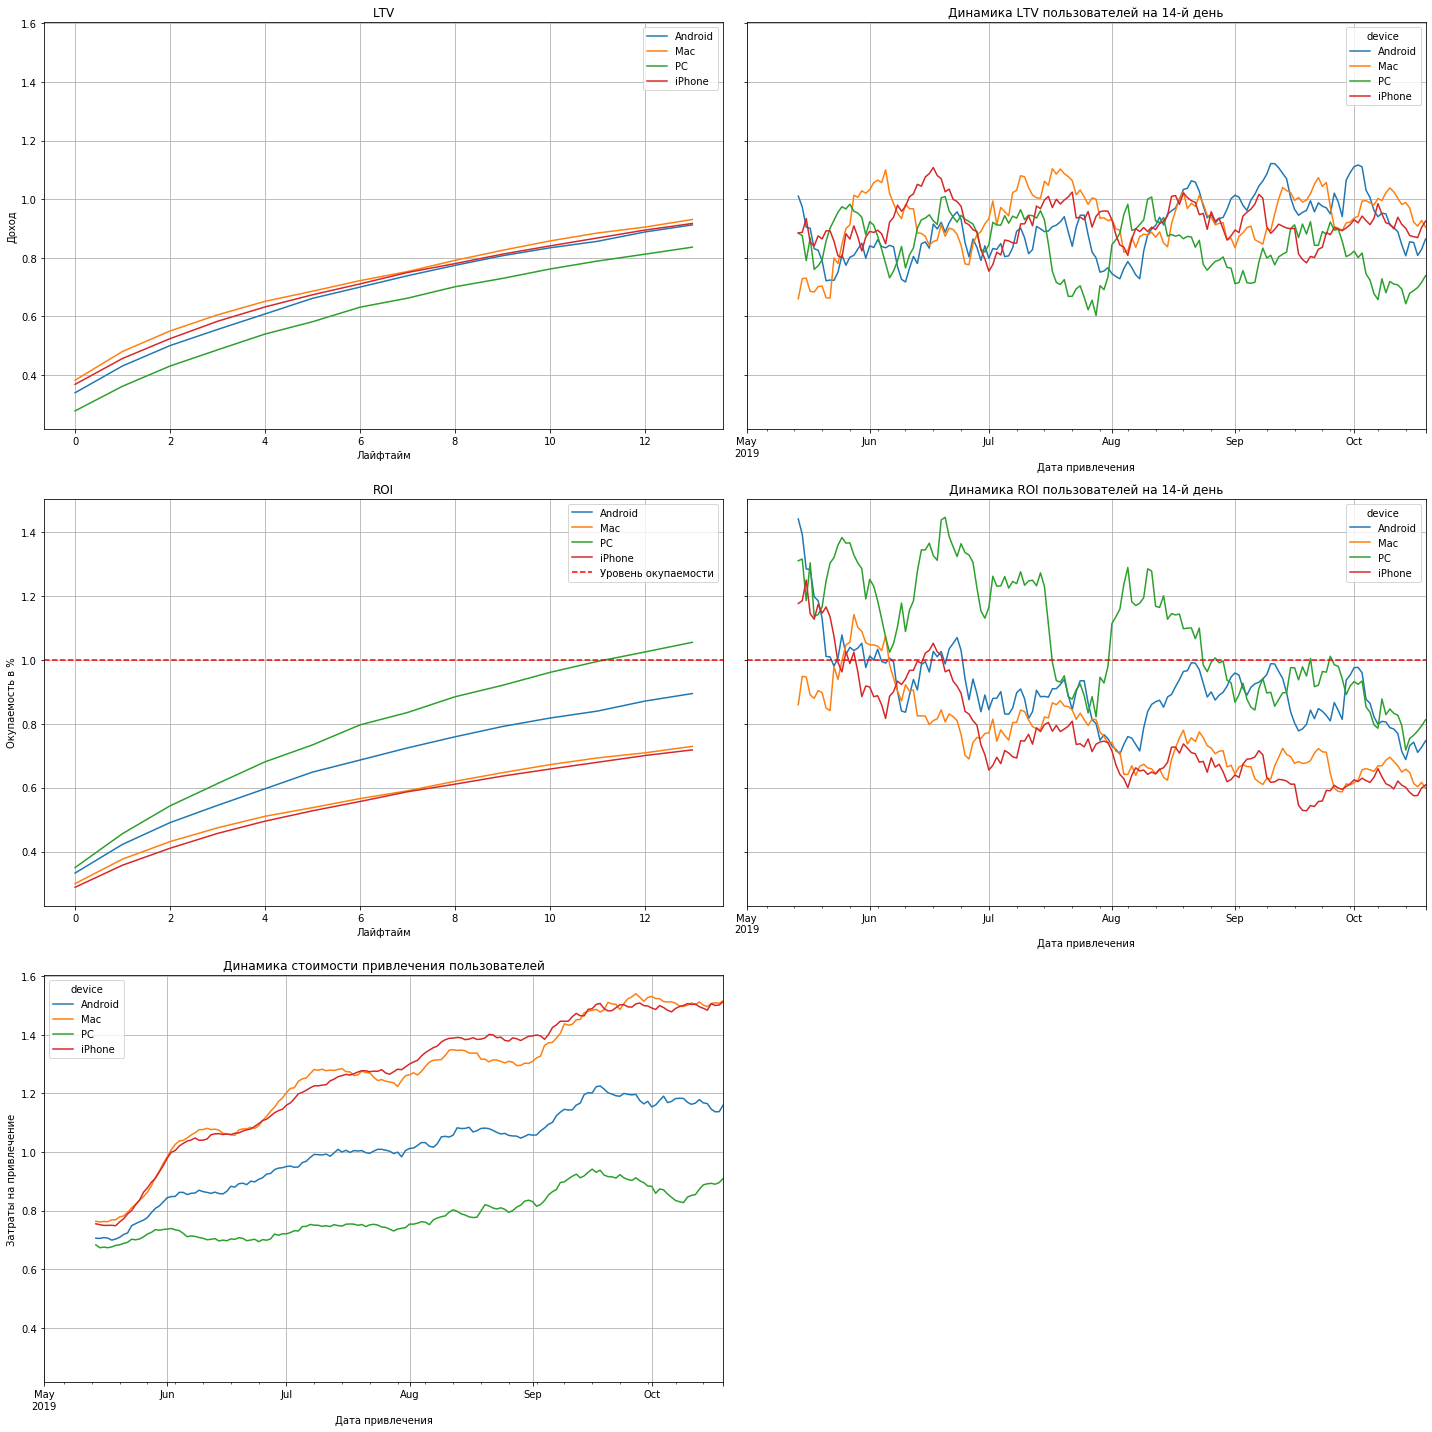

In [38]:
# посмотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 



* Пользователи PC стабильно окупаются.
* Пользователи Android, Mac и IPhone  не окупаются.
* LTV достаточно стабилен, следовательно, качество пользователей нормальное.
* Затраты на рекламу больше у устройств, которые не окупаются. Данные затраты больше на 60% чем выручка у Mac и IPhone.

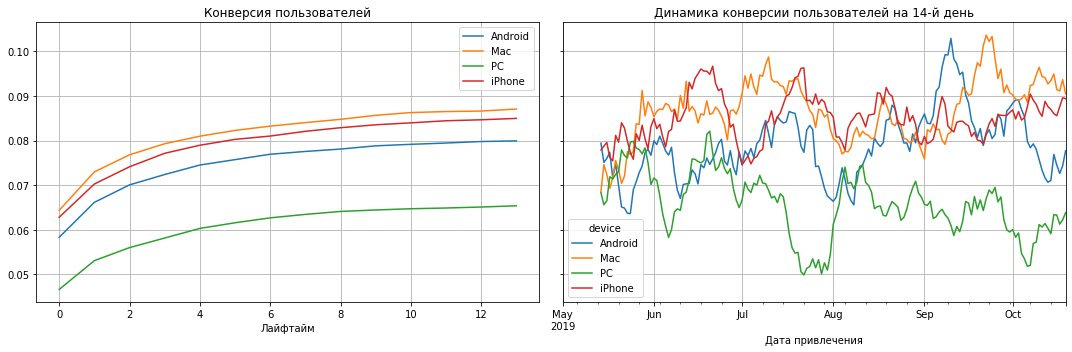

In [39]:
# посмотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи Android, Mac и IPhone имеют хорошую конверсию 8% и выше. Возможно дело в удержании, посмотрим его.  

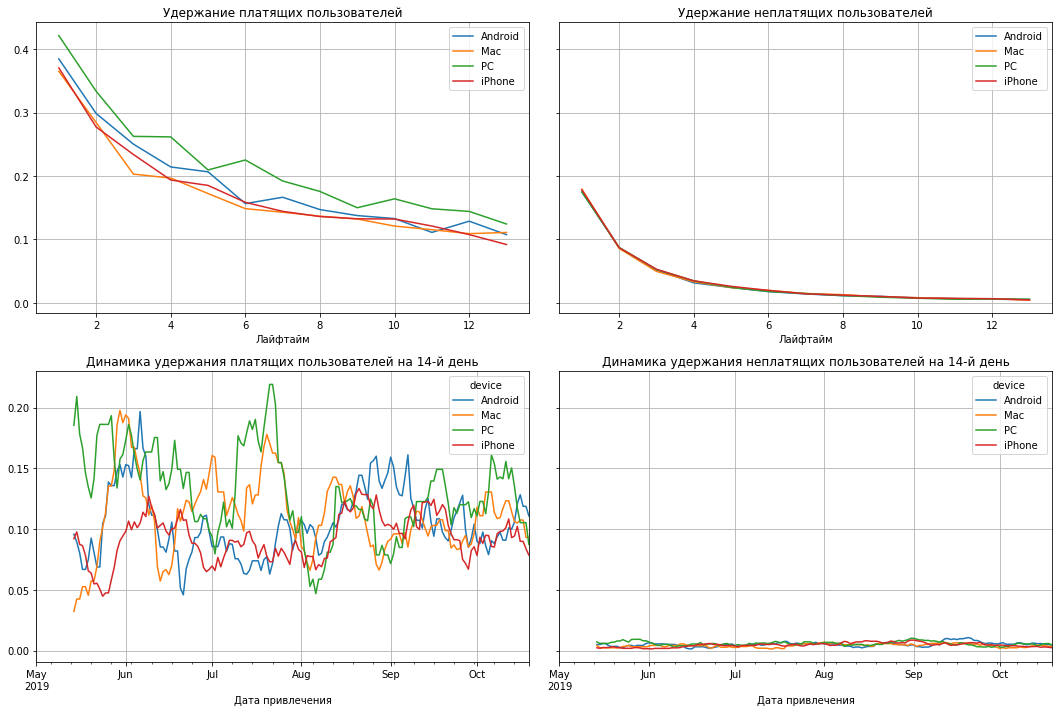

In [40]:
# Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи Mac и IPhone удерживаются хуже, но разница не сильно велика. Поищем причину убытков в других разбивках.

### Анализ окупаемости рекламы с разбивкой по странам

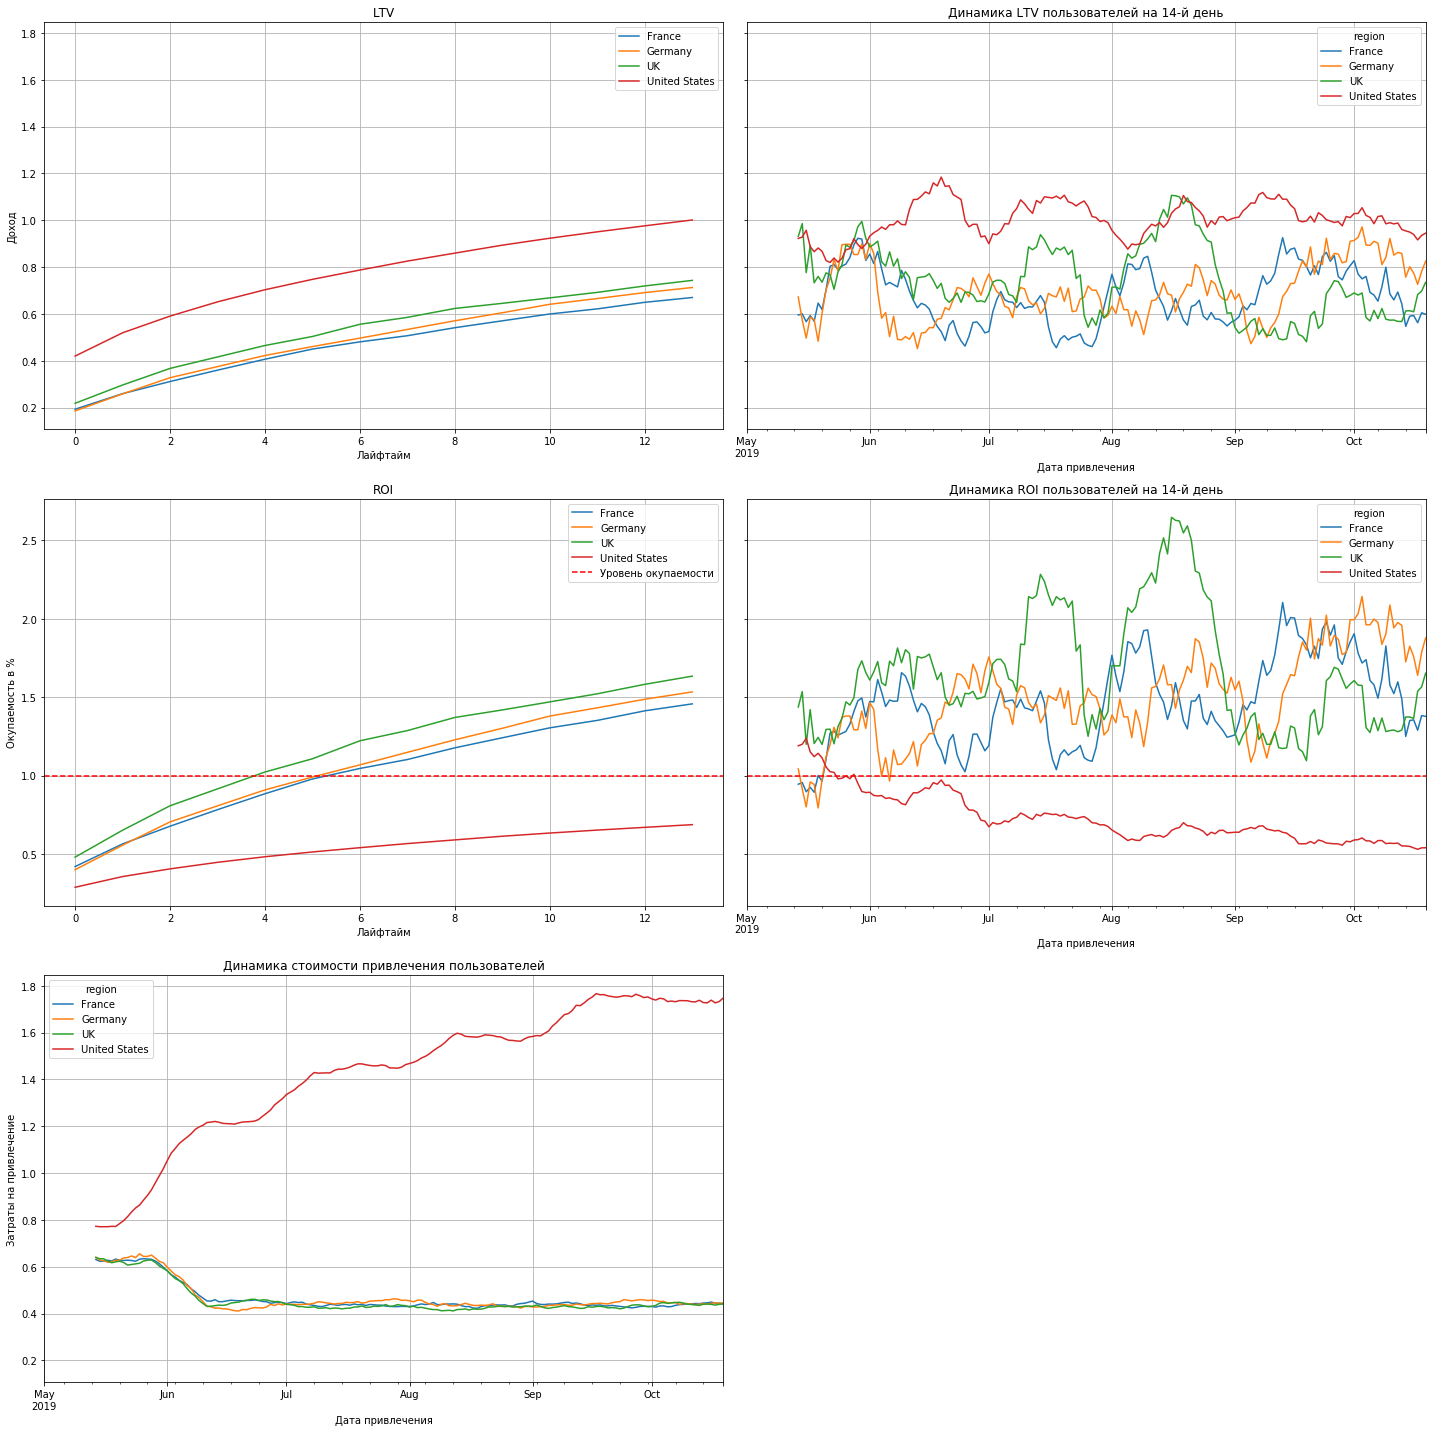

In [41]:
# посмотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 




* Реклама не окупается в  United States.
* Реклама в других странах окупается в течении первых шести дней.
* Стоимость привлечения почти стабильна и одинакова для всех стран, кроме United States, для нее стоимость постоянно растет, а тем временем окупаемость падает все ниже.
* Всех больше приносят выручку клиенты из United States, хотя реклама для этой страны не окупается, а траты на нее выше почти на 80% чем выручка.
* Рассмотрим конверсию и удержание подробней для данной страны.


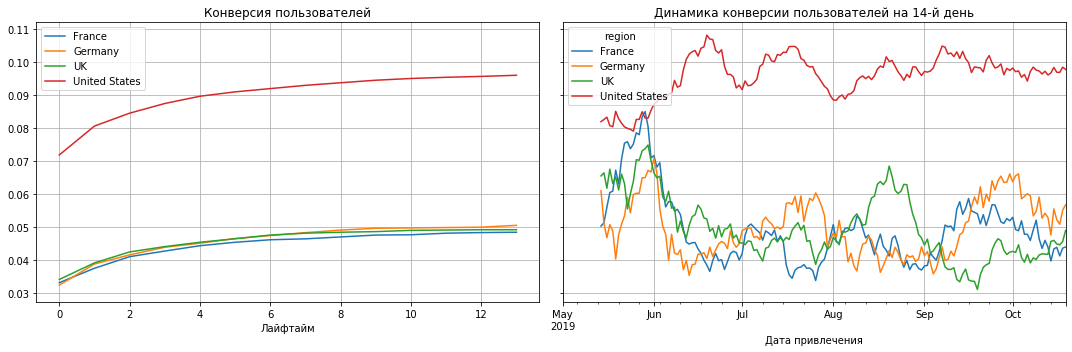

In [42]:
# посмотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи United States конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. 

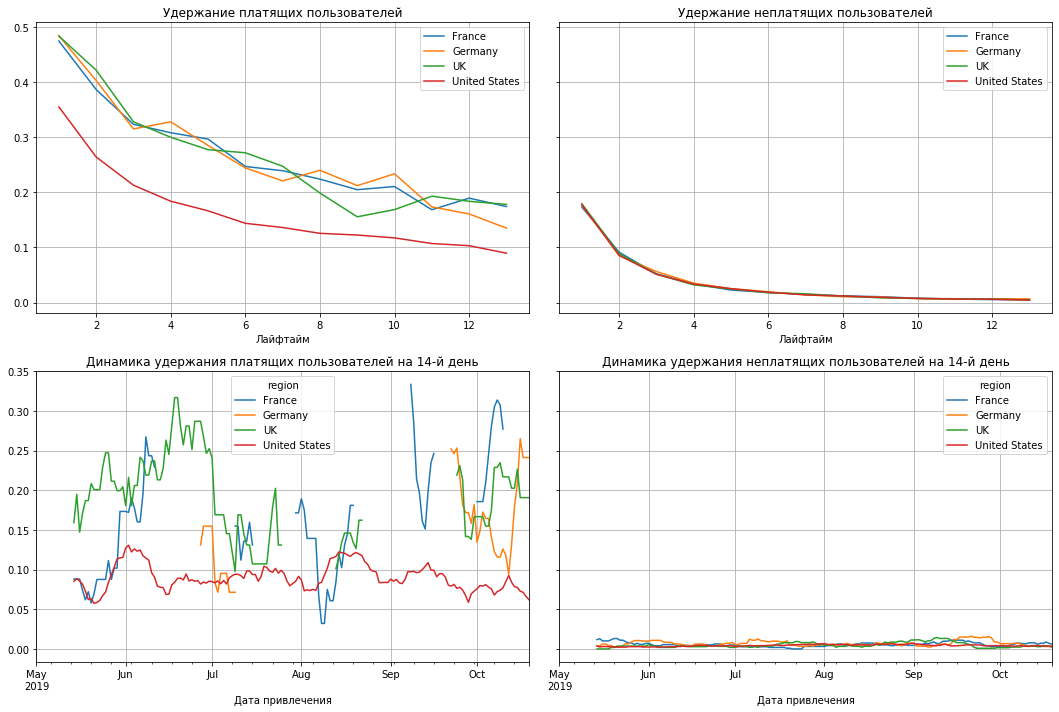

In [43]:
# Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи United States стабильно плохо удерживаются, с разницей примерно в 5% от остальных.

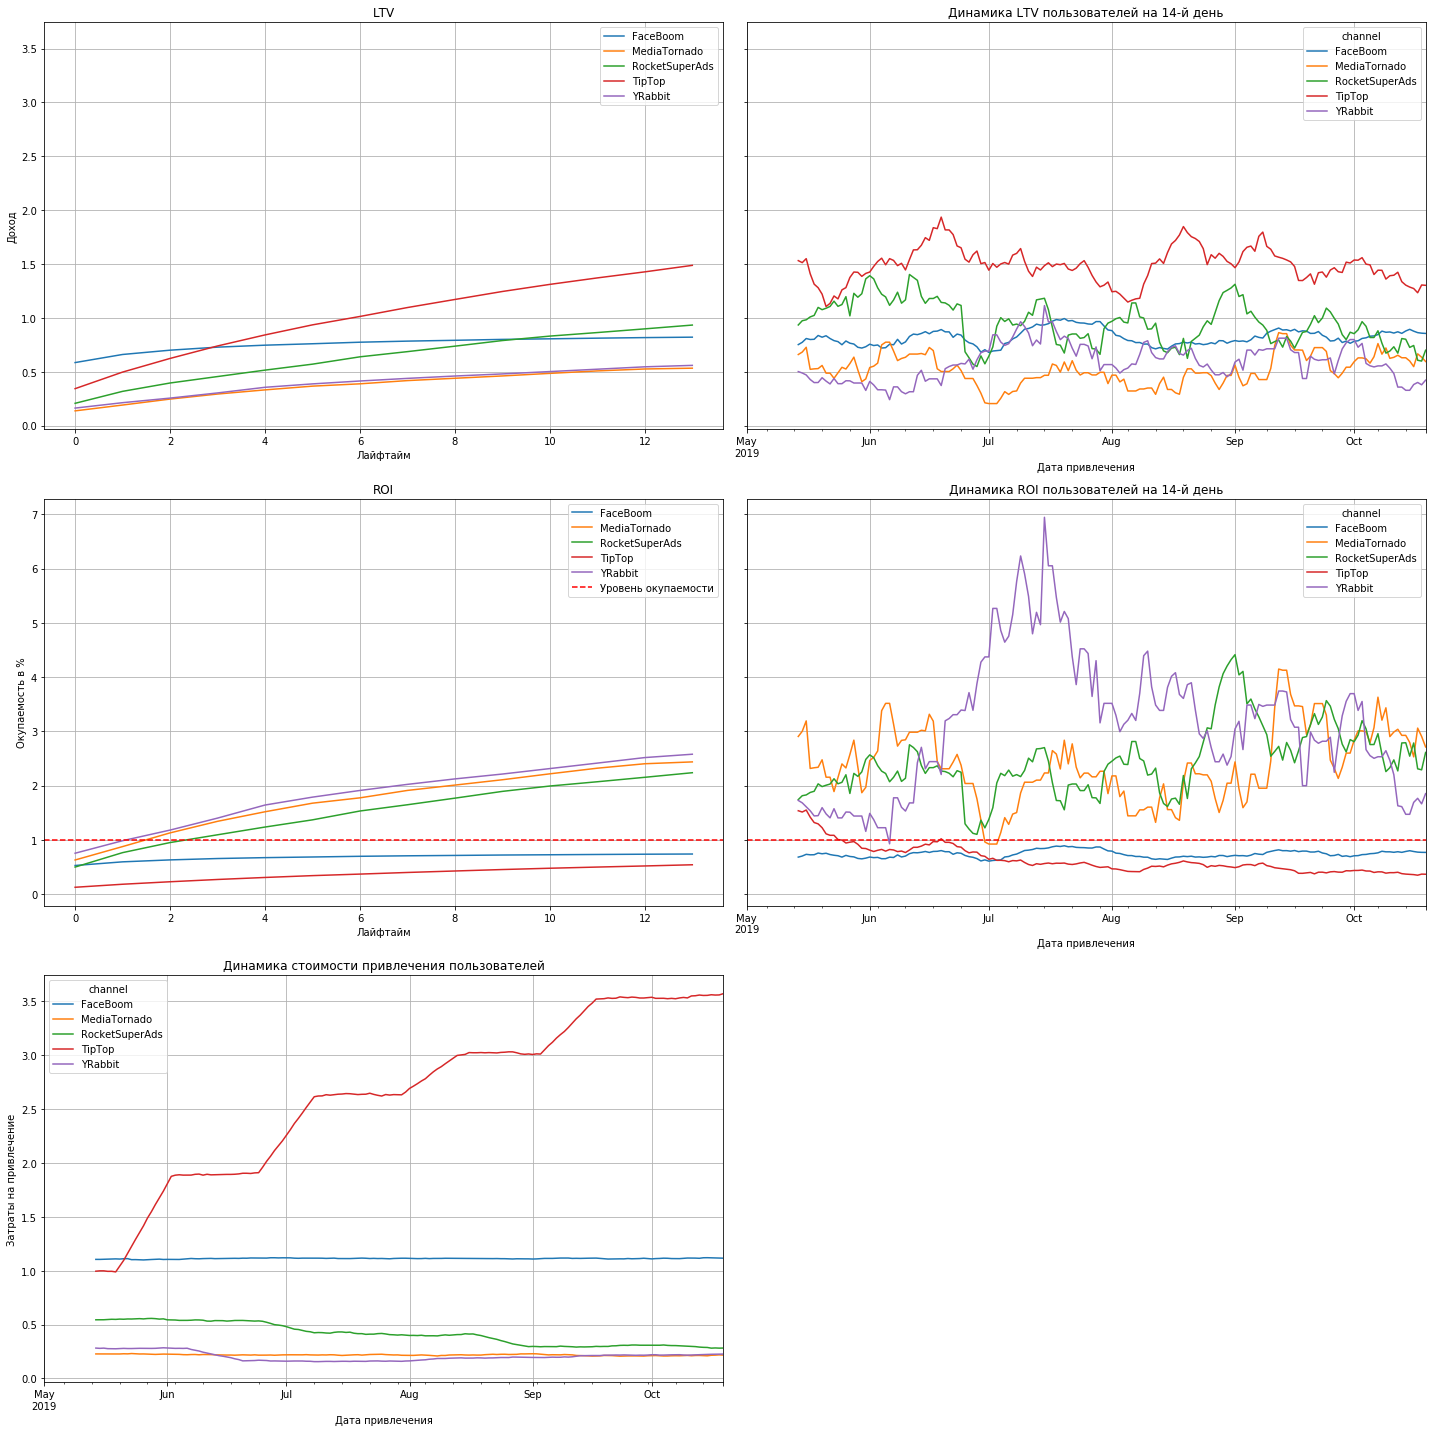

In [44]:
# изучим отдельно рекламу в United States
profiles_usa = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

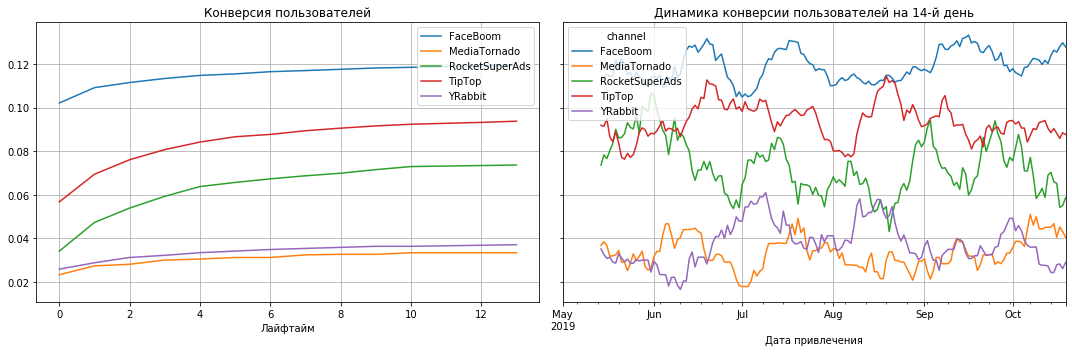

In [45]:
# посмотрим конверсию с разбивкой по каналам для США

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

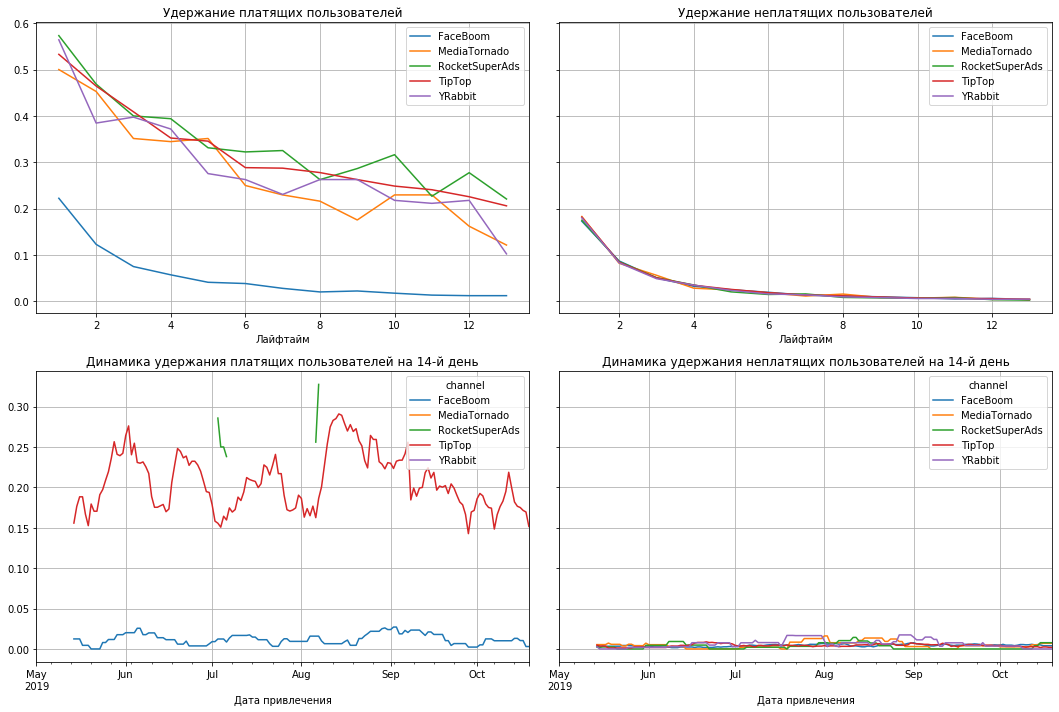

In [46]:
# Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках удержание.

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

* Для ползователей из США, исползуются пять источников для привлечения : FaceBoom, MediaTornado, RocketSuperAds, TipTop и  YRabbit. 
* Уже на второй день окупаются YRabbit, MediaTornado и RocketSuperAds.
* Неокупаются FaceBoom и TipTop
* Хотя канал TipTop приносит больше всех выручки, затраты на него выше прибыли с него на 200%
* Канал RocketSuperAds окупается очень быстро, не смотря на то, что стоимость рекламы в нем к октябрю упала с 0,6 до 0,3 долларов, LTV снизилось не существенно, а окупаемость к октябрю немного возрасла. Данный канал имеет хорошую стабильную конверсию, в среднем выше 7 долларов и самое лучшее удержание.
* Канал FaceBoom, имеет высокую, хорошую конверсию, но удерживается  хуже всех.

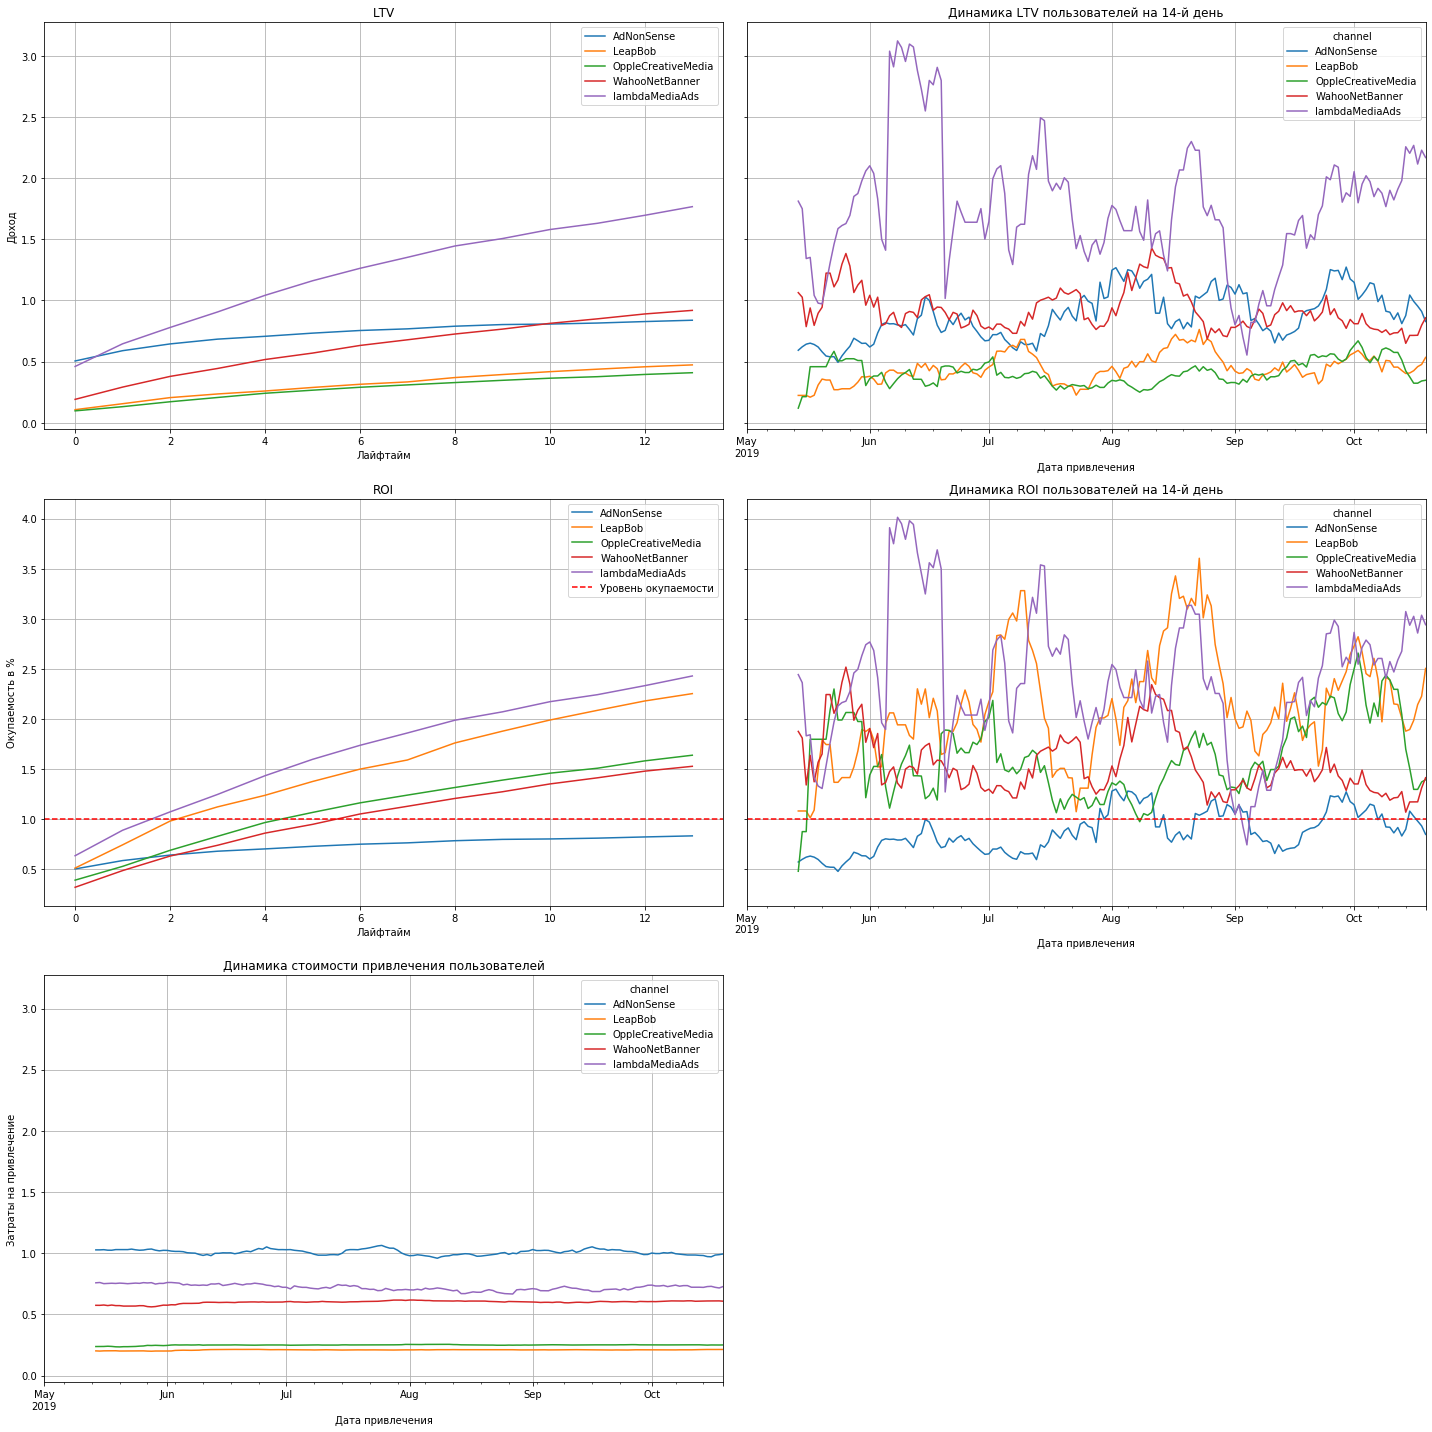

In [47]:
# изучим отдельно рекламу в Европе
profiles_es = profiles.query('region != "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_es, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

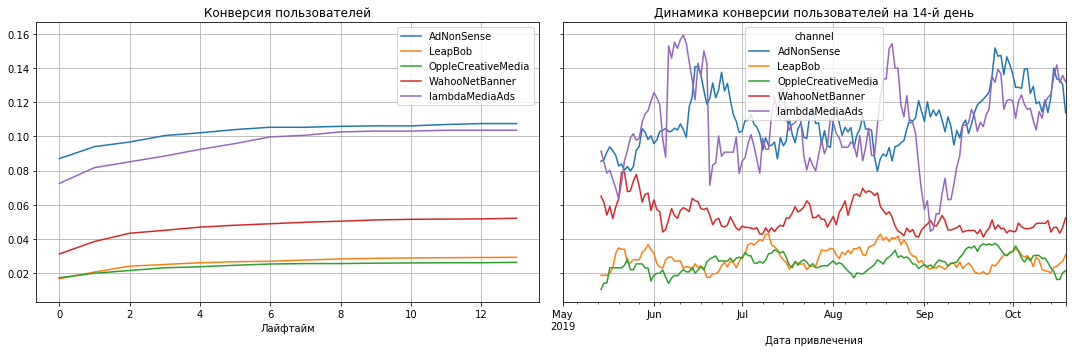

In [48]:
# посмотрим конверсию с разбивкой по каналам для Европы

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_es, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

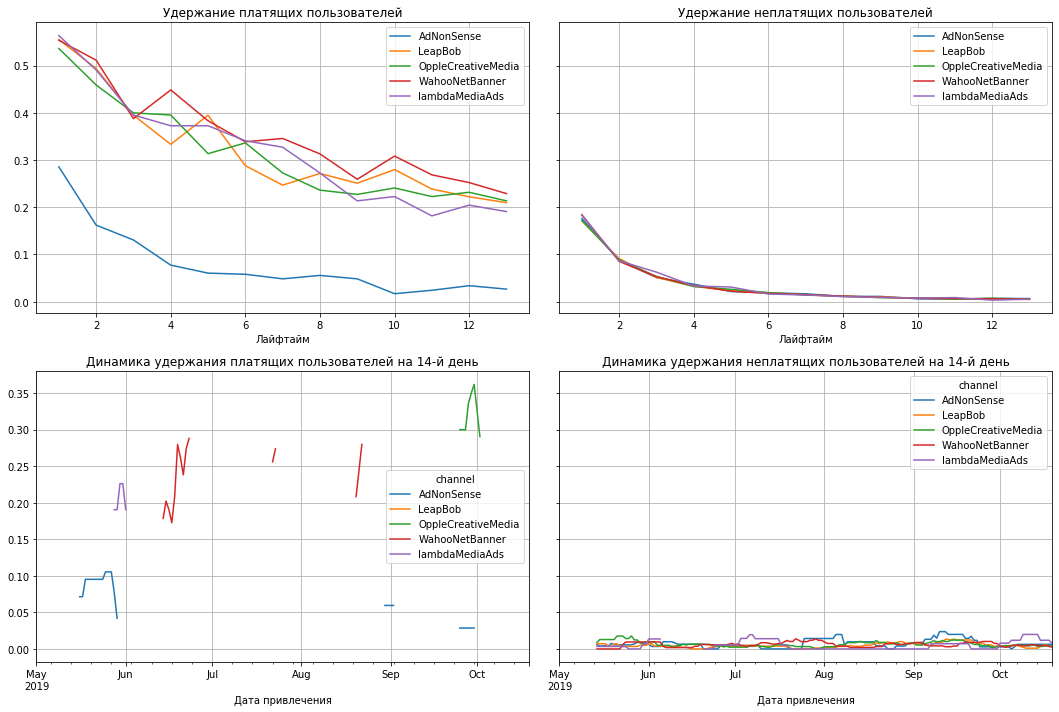

In [49]:
# Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках удержание для Европы.

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_es, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

* Для ползователей из Европы, исползуются пять источников для привлечения: OppleCreativeMedia, LeapBob, WahooNetBanner,  AdNonSense, lambdaMediaAds.
* В течении первых шести дней окупаются все источники, кроме AdNonSense.
* Канал AdNonSense имеет самую высокую конверсию, но хуже всех удерживаются пользователи с него.
* Стоит обратить внимание на канал lambdaMediaAds. Он окупается в течении первых двух дней. Прибыль от пользователей привышает затраты на рекламу почти в 2,5 раза. Не очень стабильная, но высокая конверсия выше 10 долларов. Удержание примерно такое же как и у других каналов (не считая AdNonSense).
* Так же канал LeapBob окупается уже на второй день, имеет самую низкую стоимость рекламы, выручка выше затрат на рекламу почти в два раза. Имеет конверсию примерно 3 доллара и среднее удержание относительно других каналов.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

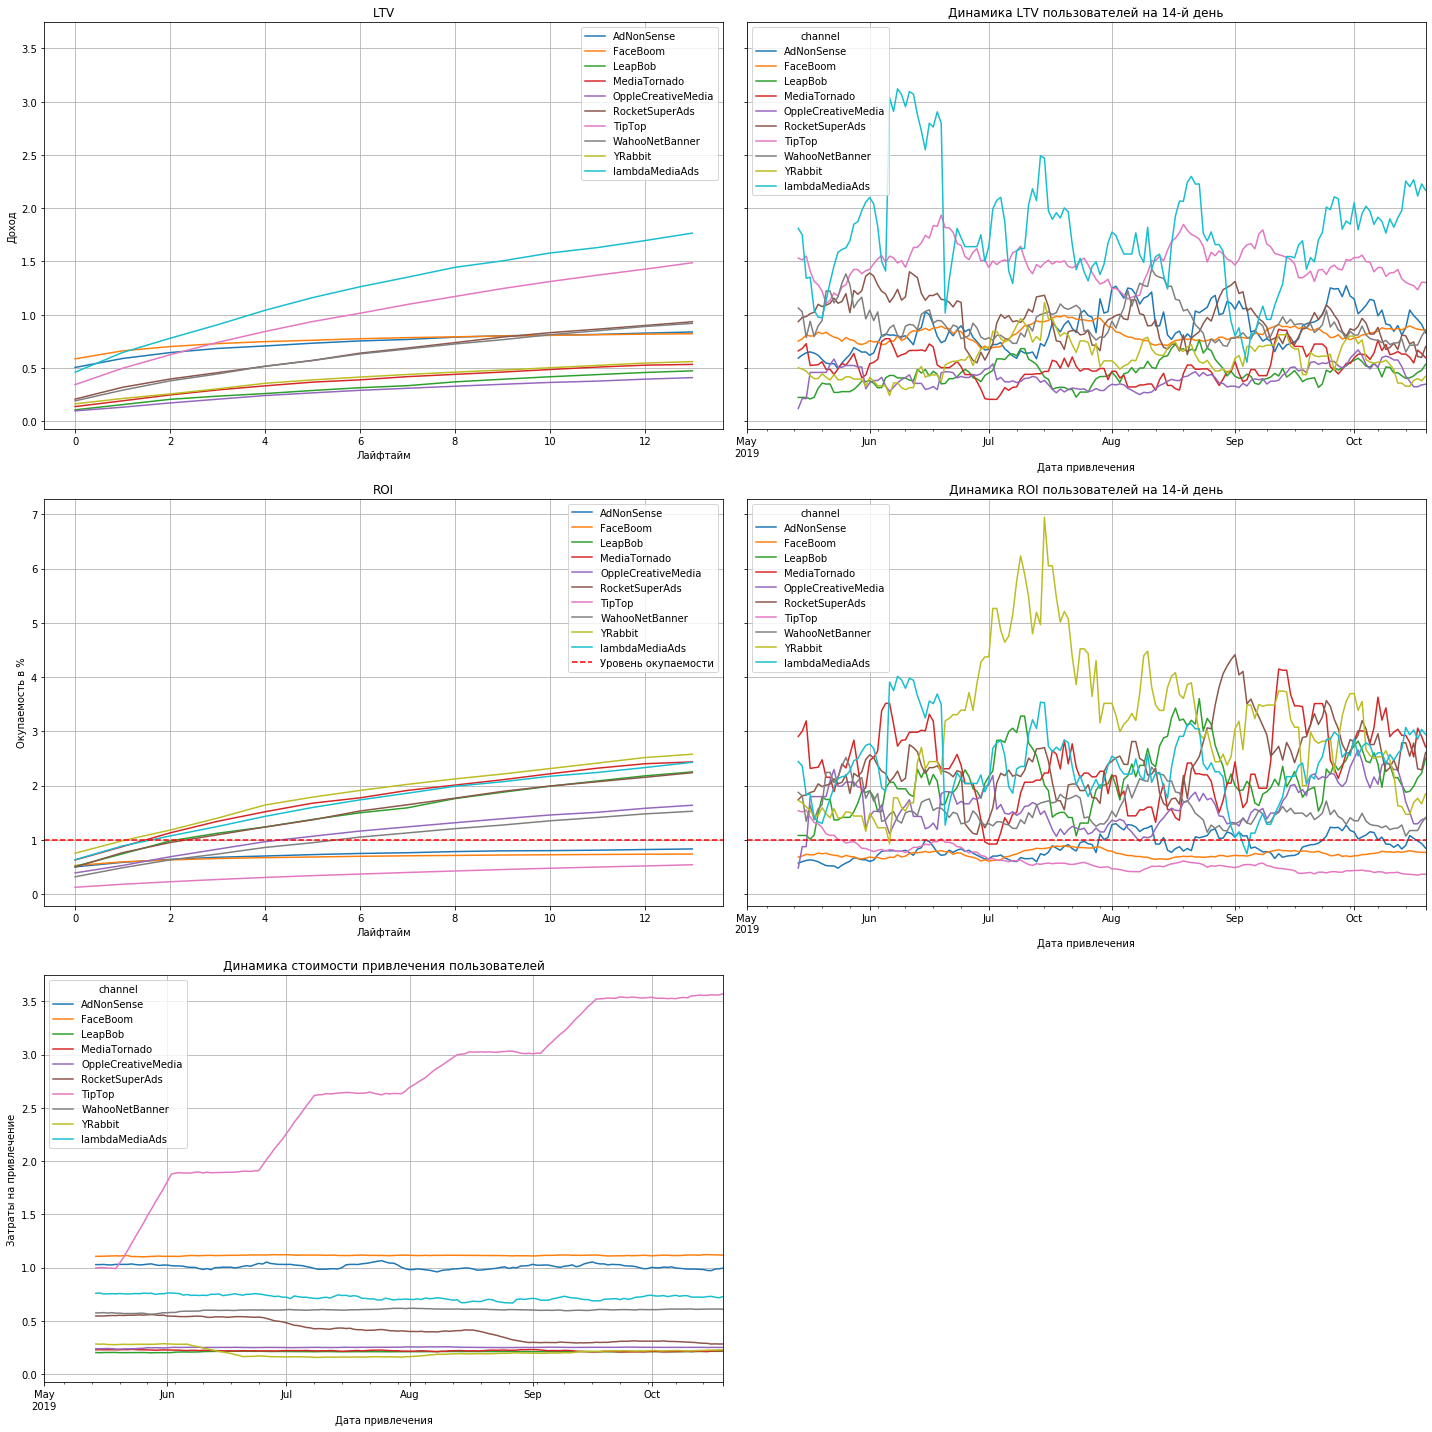

In [50]:
# посмотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 


* Почти по всем источникам происходит окупаемость уже в течении первой недели.
* Реклама не окупается в  TipTop, FaseBoom и AdNonSense.
* Стоимость привлечения стабильна и одинакова для всех источников, кроме TipTop, для него стоимость постоянно растет и превышает выручку на 200%.
* Рассмотрим конверсию и обратим внимание на источник TipTop. 

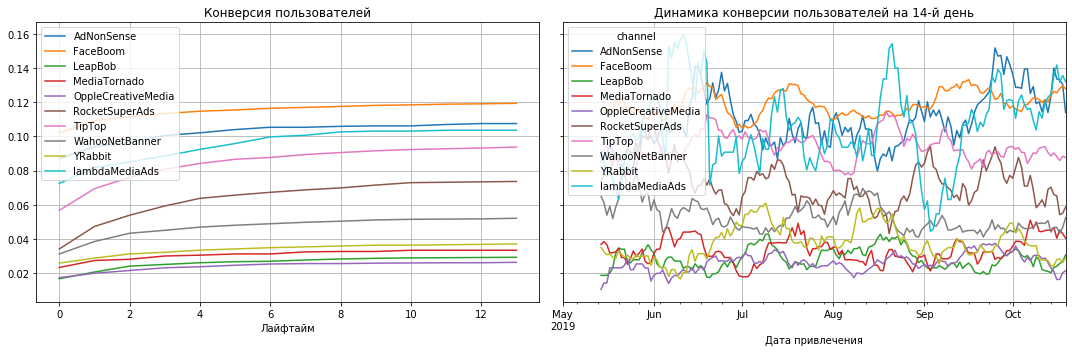

In [51]:
# посмотрим конверсию с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия TipTop не самая низкая.

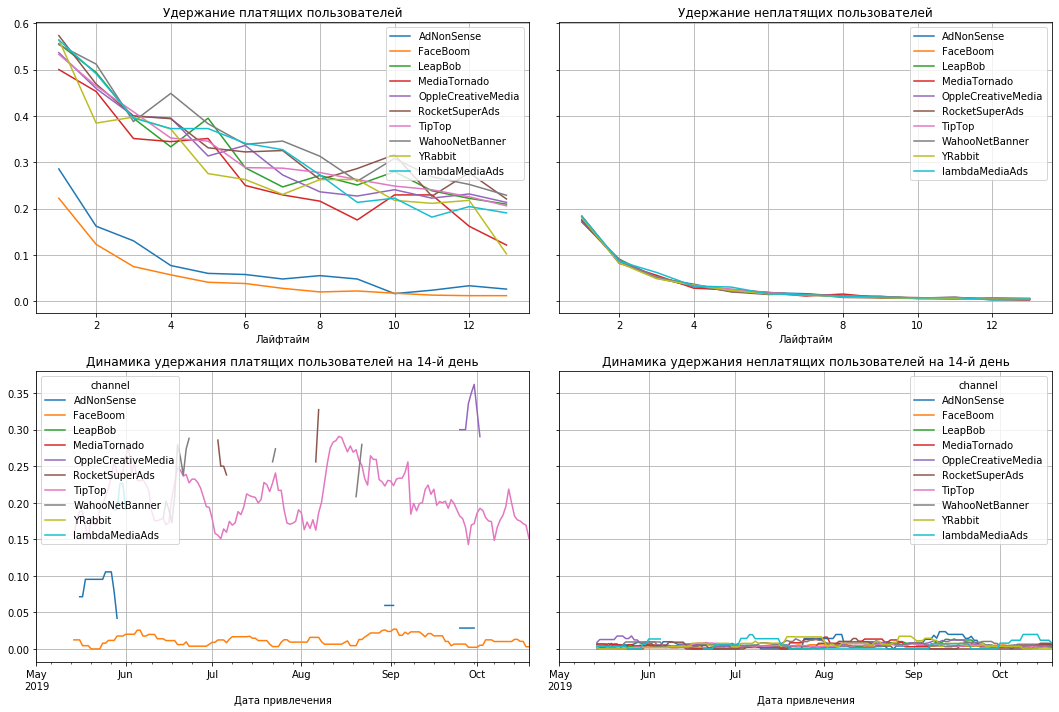

In [52]:
# Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

Очень плохо удерживаются пользователи из источников FaseBoom и AdNonSense. У TipTop удержание хорошее, хотя реклама не окупается, возможно дело в через чур больших трат на нее.


### Вывод:

1. Пользователи с устроиств Mac и IPhone, хорошо конвертируются, удерживаются хуже, но с небольшой разницей, чтобы ее считать существенной, а вот траты на рекламу для них крайне высоки, от этого идет и неокупаемость. Возможно стоит расмотреть уменьшение трат на рекламу для этих пользователей, скорее всего конверсия и удержание не снизятся из-за этого.

2. Пользователи из страны United States лучше всех конвертируются, но хуже всех удерживаются. Реклама для этой страны не окупается, а траты на нее выше на 80% чем выручка. Возможно стоит рассмотреть уменьшение трат на рекламу для таких пользователей и потратиться на их удержания, с помощью каких-либо акций.

3. Не смотря на то, что у пользователей, пришедших от источника TipTop стабильная хорошая конверсия и удержание не самое низкое, но траты на рекламу в 2 раза привышают выручку от него, поэтому стоит рассмотреть уменьшение трат на рекламу из этого источника. А источники FaseBoom и AdNonSense, пусть и приносит самую высокую конверсию, но удерживаются пользователи с него самые низкие, а затраты на рекламу занимают второе и третье места после TipTop. Поэтому стоит рассмотреть вариант, отказаться покупать рекламу в данных источниках.


##  Выводы


**I. Перед анализом, мы изучили данные:**
* Просмотрев информацию о таблицах, убедились, что в них нет пропусков, количество значений совпадает во всех столбцах у каждой таблицы.
* Проверив дубликаты, их не обнаружили.
* Поменяли тип данных в столбцах содержащих даты.
* Задали функции для расчета и анализа LTV, ROI, удержания и конверсии

**II. Исследовательский анализ данных:**
* Минимальная дата привлечения клиентов  - 1 мая 2019 года
* Максимальная дата привлечения клиентов  - 27 октября 2019 года.
* Пользователи приходят из таких регионов как  - United States, UK, France, Germany
* Больше всего платящих пользователей в United States, Germany
* Пользователи нашего приложения пользуются устройствами такими как : iPhone, Android, PC, Mac
* Больше всего платящих пользователей на Mac и iPhone
* Привлечение пользователей шло по рекламным каналам таким как : FaceBoom, TipTop, OppleCreativeMedia, LeapBob,
  WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, AdNonSense, lambdaMediaAds.
* Топ -3 рекламных канала, которые приносят больше всего платящих пользователей: FaceBoom, AdNonSense, lambdaMediaAds. 
* Очень много приходят органических пользователей, значит приложения популярное.Но платящих пользователей из данного какнала всех меньше.

**III. Маркетинговое исследование:**
* Общая сумма расходов на маркетинг в период с 1 мая по 27 октября 2019 года составила 105497 долларов.
* Всех больше потратили денег на рекламу такие источники как : TipTop (54751.30) и FaceBoom (32445.60)
* Всех меньше тратят денег на рекламу MediaTornado (954.48) и YRabbit (944.22)		
* Средняя стоимость привлечения одного пользователя для всего проекта составляет 0.70328 долларов.
* Всех дороже обходятся клиенты, привлеченные из источников TipTop (2,799) и FaceBoom (1,113).
* Всех дешевле обходятся клиенты, пришедшие из источников MediaTornado	(0.219) и LeapBob (0.210).
* Клиенты из organic пришли сами, без помощи рекламы.
* Средняя стоимость привлечения клиента у всех источников в течении всего периода стабильна, только у TipTop она постоянно растет до сентября, далее стабильна.

**IV. Оценка окупаемости рекламы для привлечения пользователей:**
* Реклама не окупается. ROI в конце второй недели достигает 80%.
* CAC в течении всего периода постепенно увеличивается. Возможно убытки из-за увеличения рекламного бюджета.
* В мае, частично июне реклама окупается, далее окупаемости нет. 
* На LTV сезонных факторов не наблюдается, данный показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей
* Посмотрим окупаемость с разбивкой, поищем там причину постоянных убытков нашего приложения.
* Пользователи с устроиств Mac и IPhone, хорошо конвертируются, удерживаются хуже, но с небольшой разницей, чтобы ее считать существенной, а вот траты на рекламу для них крайне высоки, от этого идет и неокупаемость. Возможно стоит расмотреть уменьшение трат на рекламу для этих пользователей, скорее всего конверсия и удержание не снизятся из-за этого.
* Пользователи из страны United States лучше всех конвертируются, но хуже всех удерживаются. Реклама для этой страны не окупается, а траты на нее выше на 80% чем выручка. Возможно стоит рассмотреть уменьшение трат на рекламу для таких пользователей и потратиться на их удержания, с помощью каких-либо акций.
* Не смотря на то, что у пользователей, пришедших от источника TipTop стабильная хорошая конверсия и удержание не самое низкое, но траты на рекламу в 2 раза привышают выручку от него, поэтому стоит рассмотреть уменьшение трат на рекламу из этого источника. А источники FaseBoom и AdNonSense, пусть и приносит самую высокую конверсию, но удерживаются пользователи с него самые низкие, а затраты на рекламу занимают второе и третье места после TipTop. Поэтому стоит рассмотреть вариант, отказаться покупать рекламу в данных источниках.

**V. Рекомендации:**

После анализа данных развлекательного приложения Procrastinate Pro+ обнаружилась основная причина неэффетивности привлечения пользователей. Это неэффективное распределение средств на рекламу по каналам.

Для того, чтобы минимизировать убытки и повысить прибыль, стоит рассмотреть варианты:

1. Источник FaseBoom занимает второе место по расходам (30,75% от всей суммы) на рекламу для пользователей из США, а она не окупается, и имеет самое низкое удержание пользователей, поэтому стоит расмотреть вариант не покупать рекламу у данного канала.
2. Источник TipTop занимает 1 место по количеству денег потраченных на рекламу (51,9% от всей суммы), а конверсия и удержание не силно отличается от остальных. Поэтому стоит рассмотреть вариант, снижения затрат на рекламу в данном канале.
3. Обратить внимание на канал RocketSuperAds, так как он окупается очень быстро, не смотря на то, что стоимость рекламы в нем к октябрю упала с 0,6 до 0,3 долларов, LTV снизилось не существенно, а окупаемость к октябрю даже немного возрасла. Данный канал имеет хорошую стабильную конверсию, в среднем выше 7 долларов и самое лучшее удержание среди остальных каналов. Затраты на данный канал составляют всего 1,74% от всей суммы, поэтому стоит увеличить затраты на рекламу в данном канале, это может привести к увеличению конверсии, еще лучшему удержанию и окупаемости.
4. Для пользователей из Европы, стоит прекратить вкладываться в рекламу в источнике AdNonSense. Приходящие с этого источника пользователи имеют очень низкое удержание и реклама не окупается.
5. Обратить авнимание на такой перспективный канал как lambdaMediaAds. Он окупается в течении первых двух дней. Прибыль от пользователей привышает затраты на рекламу почти в 2,5 раза. Не очень стабильная, но высокая конверсия выше 10 долларов. Удержание примерно такое же как и у других каналов. Затраты на рекламу от всего бюджета составляют всего 1,48%. Стоит рассмотреть вариант увеличить затраты на рекламу в данном канале, это может превести к еще большему улучшению всех показателей.
6. И источник LeapBob окупается тоже очень быстро, имеет самую низкую стоимость рекламы, выручка выше затрат на рекламу почти в два раза. Имеет конверсию примерно 3 доллара и среднее удержание относительно других каналов. Сократив траты на неокупающиеся каналы, и увеличив на такой как LeapBob, можно улучшить показатели окупаемости, конверсии и удержания, что приведет к увеличению прибыли.

